In [9]:
# -*- coding:utf-8 -*-
import jieba
import jieba.analyse
import jieba.posseg as pseg
import codecs,sys
def cut_words(sentence):
    #print sentence
    return " ".join(jieba.cut(sentence)).encode('utf-8')
f=codecs.open('C:\\Users\\jinbin\\Desktop\\practice\\天龙八部.txt','rb')
target = codecs.open("C:\\Users\\jinbin\\Desktop\\practice\\1.txt", 'w')
print ('open files')
line_num=1
line = f.readline()
while line:
    print('---- processing ', line_num, ' article----------------')
    line_seg = " ".join(jieba.cut(line))
    target.writelines(line_seg)
    line_num = line_num + 1
    line = f.readline()
f.close()
target.close()
exit()

# python Testjieba.py

open files
---- processing  1  article----------------
---- processing  2  article----------------
---- processing  3  article----------------
---- processing  4  article----------------
---- processing  5  article----------------
---- processing  6  article----------------
---- processing  7  article----------------
---- processing  8  article----------------
---- processing  9  article----------------
---- processing  10  article----------------
---- processing  11  article----------------
---- processing  12  article----------------
---- processing  13  article----------------
---- processing  14  article----------------
---- processing  15  article----------------
---- processing  16  article----------------
---- processing  17  article----------------
---- processing  18  article----------------
---- processing  19  article----------------
---- processing  20  article----------------
---- processing  21  article----------------
---- processing  22  article----------------
---- pro

In [74]:
import gensim
#text=open("C:\\Users\\jinbin\\Desktop\\practice\\天龙八部.txt").read()

In [66]:
model = gensim.models.Word2Vec(
    text, size=400, window=5, min_count=5, workers=4)

In [67]:
model.save('C:\\Users\\jinbin\\Desktop\\practice\\qyn.model')   #训练模型的保存
modell = gensim.models.Word2Vec.load('C:\\Users\\jinbin\\Desktop\\practice\\qyn.model') #读取

#   从此开始

In [80]:
# -*- coding:utf-8 -*-
import os
os.chdir("C:\\Users\\jinbin\\Desktop\\practice")

In [155]:
with open('name.txt', 'r') as f:
    names = list(set(name.strip() for name in f.readlines()))

In [156]:
with open('天龙八部.txt', 'r',encoding='gb18030') as f:
    content = list(line.strip() for line in f.readlines())

In [157]:
f

<_io.TextIOWrapper name='天龙八部.txt' mode='r' encoding='gb18030'>

In [158]:
#content[-200:]#已全部读完

In [159]:
def find_pepple_showup_cont(num=10):
    '''
    对比统计人物姓名出现的次数，
    并返回出现次数最多的前Num个人
    '''
    novel = ''.join(content)
    showup_counts = []
    for name in names:
        # 这里从文章统计处每个名词出现的次数后，保存在一个列表里返回
        showup_counts.append([name, novel.count(name)])
    # 我们将列表通过出现次数排序
    showup_counts.sort(key=lambda v: v[1], reverse=True)

    return showup_counts[:num]

In [163]:
showup_1 = find_pepple_showup_cont(9)
print(showup_1)

[['段誉', 3371], ['萧峰', 1793], ['虚竹', 1634], ['阿紫', 1132], ['阿朱', 985], ['慕容复', 922], ['王语嫣', 858], ['段正淳', 741], ['木婉清', 735]]


In [164]:
import pandas as pd
show = pd.DataFrame(showup_1, columns=['names', 'counts'])
print(show)

  names  counts
0    段誉    3371
1    萧峰    1793
2    虚竹    1634
3    阿紫    1132
4    阿朱     985
5   慕容复     922
6   王语嫣     858
7   段正淳     741
8   木婉清     735


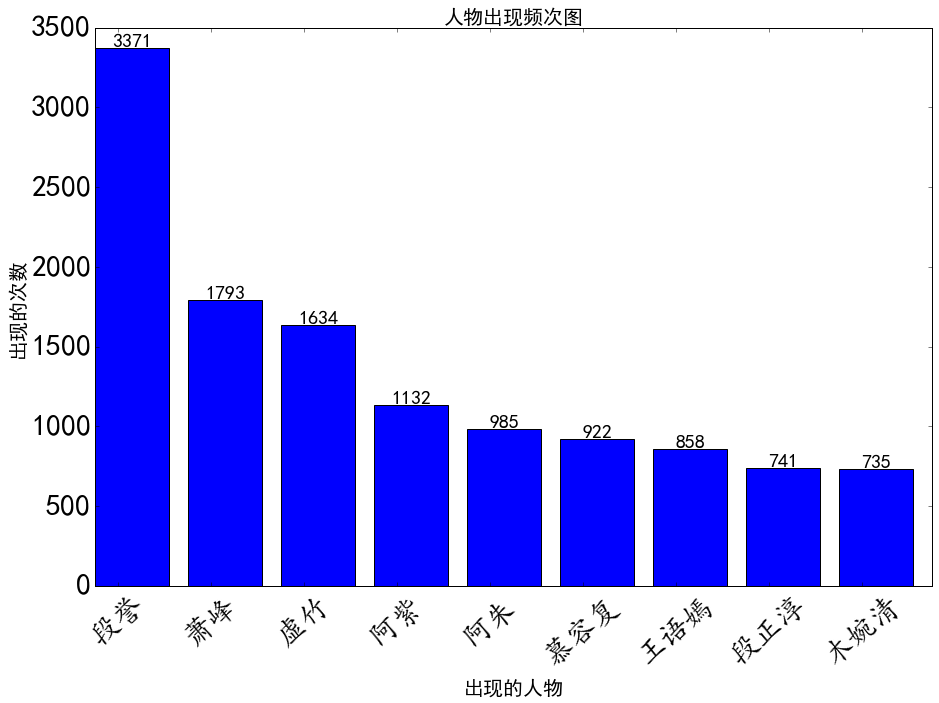

In [179]:
# 用matplotlib绘制直方图展示：
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
plt.figure(figsize=(15,10), dpi=80)
plt.yticks(fontsize=30)

idx=np.arange(len(show['names']))
plt.bar(idx,show['counts'])
zhong=matplotlib.font_manager.FontProperties(fname=
                                             'C:\Windows\Fonts\AdobeKaitiStd-Regular.otf',size=30)
plt.xticks(idx+0.5/2,show['names'],rotation=40,fontproperties=zhong)
for x ,y in zip(idx,show['counts']):
    plt.text(x+0.4,y+0.05,'%1d' % y,ha='center',va='bottom',size=20)
plt.xlabel('出现的人物',fontsize=20)
plt.ylabel('出现的次数',fontsize=20)
plt.title('人物出现频次图',fontsize=20)
#plt.savefig('001.jpg')

In [169]:
# 利用结巴分词来进行关键词查找
import jieba
import jieba.analyse
import matplotlib.pyplot as plt

In [170]:
# 获取关键词 最多的二十个
print('正在分析文章中的关键词！')
tags = jieba.analyse.extract_tags(' '.join(content), topK=20, withWeight=True)
print('关键词:')
for k, v in tags:
    print('关键词：{}   权重：{:.3f}'.format(k, v))

正在分析文章中的关键词！
关键词:
关键词：段誉   权重：0.085
关键词：虚竹   权重：0.058
关键词：萧峰   权重：0.052
关键词：乔峰   权重：0.036
关键词：慕容复   权重：0.034
关键词：说道   权重：0.031
关键词：阿朱   权重：0.031
关键词：王语嫣   权重：0.029
关键词：武功   权重：0.027
关键词：段正淳   权重：0.025
关键词：木婉清   权重：0.025
关键词：丐帮   权重：0.022
关键词：什么   权重：0.021
关键词：鸠摩智   权重：0.019
关键词：游坦之   权重：0.018
关键词：自己   权重：0.016
关键词：师父   权重：0.015
关键词：内力   权重：0.015
关键词：丁春秋   权重：0.015
关键词：大理   权重：0.014


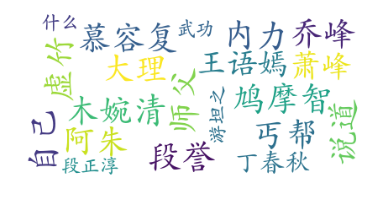

In [171]:
# 利用关键词制作图云：
from wordcloud import WordCloud
import matplotlib
txt = ''.join([v + ',' for v, x in tags])
zhong=matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\AdobeKaitiStd-Regular.otf',size=30)
wordcloud = WordCloud(background_color='white',
                      font_path='C:\Windows\Fonts\AdobeKaitiStd-Regular.otf', max_font_size=40).generate(txt)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#wordcloud.to_file('qun_gjc.jpg')

In [130]:
# 将关键词加入结巴分词
for tag, x in tags:
    jieba.add_word(tag)

In [131]:
# 将小说中的姓名加入结巴分词的关键词
for name in names:
    jieba.add_word(name)

In [132]:
# 加入中文停用词列表
with open('stopword.txt', 'r') as f:
    STOPWORD = [word.strip() for word in f.readlines()]


In [134]:
# 开始进行分词
print('开始进行分词。。。。')
# 我们期待的分词结果是保存着小说每一句话的分词结果
# 即一个二元数组，这将方便我们一会进行模型的训练
sentence = []
for line in content:
    seg_list = list(jieba.cut(line, cut_all=False))
    unique_list = []
    # 开始去除停用词
    for seg in seg_list:
        if seg not in STOPWORD:
            unique_list.append(seg)
    sentence.append(unique_list)
print('分词完毕')

开始进行分词。。。。
分词完毕


In [191]:
# 开始训练模型
import gensim
# Gensim中的Word2Vec期望的输入是经过分词的 句子列表。即是一个包含句子分词结果的二维数组
print('开始训练模型。。。这个时间很长，去喝杯咖啡吧')
model = gensim.models.Word2Vec(sentence, size=300, window=5, min_count=5, workers=4)
print('训练完毕。正在将模型保存到本地')
model.save('qyn_300.model')
print('Okey ')

开始训练模型。。。这个时间很长，去喝杯咖啡吧
训练完毕。正在将模型保存到本地
Okey 


In [192]:
# 读入训练好的模型
model = gensim.models.Word2Vec.load('qyn_300.model')


In [193]:
testwords = ['段誉','虚竹','萧峰']
for i in range(len(testwords)):
    res = model.most_similar(testwords[i])
    print (testwords[i])
    print (res)

段誉
[('木婉清', 0.9984257817268372), ('王语嫣', 0.9931397438049316), ('低声', 0.9930866360664368), ('虚竹', 0.9921783208847046), ('点头', 0.9914935827255249), ('包不同', 0.9909986257553101), ('摇头', 0.9909804463386536), ('慕容复', 0.990897536277771), ('微笑', 0.9902657270431519), ('少女', 0.989764928817749)]
虚竹
[('少女', 0.9992662668228149), ('萧峰', 0.9988692998886108), ('一红', 0.9983640909194946), ('忙', 0.9982244372367859), ('包不同', 0.9981799125671387), ('叹', 0.9981712102890015), ('阿紫', 0.9979006052017212), ('微笑', 0.9978857040405273), ('段誉叹', 0.9978044033050537), ('王夫人', 0.9978021383285522)]
萧峰
[('虚竹', 0.9988692998886108), ('少女', 0.998561680316925), ('忙', 0.9980553388595581), ('一红', 0.9979724884033203), ('阿碧', 0.9979259967803955), ('叹', 0.9976993203163147), ('阿紫', 0.9975394010543823), ('包不同', 0.9975342154502869), ('女郎', 0.9972356557846069), ('游坦之', 0.9970831871032715)]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()


In [147]:
testwords = ['段誉','虚竹','乔峰']
for i in range(len(testwords)):
    res = model.most_similar(testwords[i])
    print (testwords[i])
    print (res)

段誉
[('木婉清', 0.9977927207946777), ('王语嫣', 0.9965882301330566), ('笑', 0.992314875125885), ('低声', 0.9920505285263062), ('阿朱', 0.9896395206451416), ('虚竹', 0.9894264340400696), ('「', 0.9890210032463074), ('点头', 0.9885633587837219), ('问', 0.9883801937103271), ('包不同', 0.9880818724632263)]
虚竹
[('少女', 0.9993131160736084), ('点头', 0.9988178014755249), ('低声', 0.9987728595733643), ('包不同', 0.9987163543701172), ('微笑', 0.9986566305160522), ('阿紫叫', 0.9985869526863098), ('阿碧', 0.998510479927063), ('段正淳', 0.9983669519424438), ('一红', 0.998359203338623), ('问道', 0.9982624650001526)]
乔峰
[('表哥', 0.9992401599884033), ('多谢', 0.9992043972015381), ('大哥', 0.9990015029907227), ('王姑娘', 0.9989372491836548), ('阿碧', 0.9988626837730408), ('叹', 0.9987015724182129), ('好些', 0.9986900687217712), ('说错', 0.9986886978149414), ('正色', 0.9986861944198608), ('和尚', 0.9985854625701904)]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()


In [201]:
model.most_similar('天山童姥')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('姊妹', 0.9999451637268066),
 ('只须', 0.9999423027038574),
 ('古怪', 0.9999396800994873),
 ('迟', 0.9999392032623291),
 ('一生', 0.9999392032623291),
 ('相见', 0.9999384880065918),
 ('定然', 0.9999338388442993),
 ('姥姥', 0.9999333620071411),
 ('救人', 0.9999304413795471),
 ('童姥道', 0.9999291896820068)]